#### AUTHOR : VAISHNAV KRISHNA P
### MODEL : Using Logistic regression with only 2000 records of 10000
#### Accuracy : 85.6%


In [231]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
# importing the datagframe
df = pd.read_csv('clean_df.csv')

In [233]:
df.shape

(10000, 9)

In [234]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,geez forget weve alreadi discuss marx anarchis...
1,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,carioca rfa thank support request adminship fi...
2,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,birthday worri enjoy ur daytalk
3,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,pseudosci categori im assum articl pseudosci c...
4,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,phrase exist would provid search engin even me...


In [235]:
# Now comment text and id is not required
df.drop(columns=['id','comment_text'], inplace=True)

In [236]:
# shape after dropping
df.shape

(10000, 7)

In [237]:
# Define the order of labels (priority-wise, if multiple are 1)
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to assign label
def assign_label(row):
    for label in label_cols:
        if row[label] == 1:
            return 1
    return 0

# Apply function to create 'label' column
df['label'] = df.apply(assign_label, axis=1)

In [238]:
# Label for the comment : toxic or not
df['label'].value_counts()

,count
label,
0,8995
1,1005


In [239]:
# classifying  the clean and toxic text
clean_text = df[df['label'] == 0].sample(1005, random_state=42)
toxic_text = df[df['label'] == 1]

In [240]:
clean_text.shape, toxic_text.shape

((1005, 8), (1005, 8))

In [241]:
# Import libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [242]:
# Combine all text in 'clean_text' for the clean word cloud
clean_text_combined = ' '.join(clean_text['clean_text'].astype(str).tolist())

# Combine all text in 'toxic_text' for the toxic word cloud
toxic_text_combined = ' '.join(toxic_text['clean_text'].astype(str).tolist())

# Generate clean word cloud
wordcloud_clean = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(clean_text_combined)

# Generate toxic word cloud
wordcloud_toxic = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(toxic_text_combined)

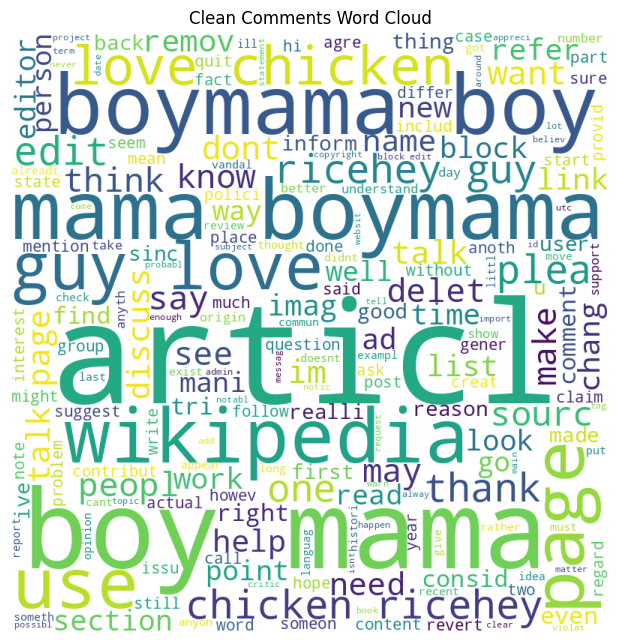

In [243]:

# Display the generated images
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud_clean)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Clean Comments Word Cloud")
plt.show()

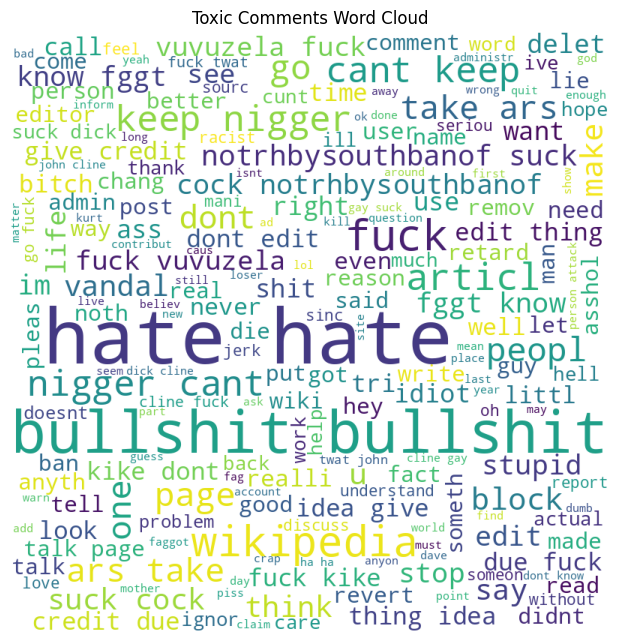

In [244]:
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud_toxic)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Toxic Comments Word Cloud")
plt.show()

In [268]:
# Combine two dataframe
df = pd.concat([clean_text, toxic_text])

In [269]:
# dependent and independent features
X = df['clean_text'].values
y = df['label'].values

In [270]:
# Tf-idf transformations
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)

In [271]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [279]:
# Training using a simple logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [280]:
# predictions
predictions = model.predict(X_test)

In [281]:
# Model Validations
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(predictions,y_test)

0.8258706467661692

In [282]:
text = "This are a shit videos"

text_transform = vectorizer.transform([text])
y_label = model.predict(text_transform)

if(y_label == 0):
  print("Model Predicted as : Clean Text")
else:
  print("Model Predicted as: Toxic Text")

Model Predicted as: Toxic Text
